# Recognising the Data Drift in Boston data


## We can use library such as evidently to know the presence of data drift



In [1]:
! pip install evidently==0.2.8

In [2]:
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection


c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\evidently\analyzers\__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\evidently\dashboard\__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")
c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\evidently\tabs\__init__.py:8: UserWarning: 'import evidently.tabs' is deprecated, use 'import evidently.dashboard.tabs'
  warnings.warn(
c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\evidently\model_profile\__init__.py:8: UserWarning: model profiles are deprecated, use metrics instead
  warnings.warn("model profiles are deprecated, use metrics instead")
c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\evidently\profile_sections\__init__.py:8: UserWarning: 'import evidently.profile_sections' is deprecated, use 

**"DataDriftTab   is for numerical feat. &  CatTargetDriftTab is for the categorical feat.**

## Loading Data

In [3]:
import pandas as pd
import numpy as np

data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_frame= pd.read_csv(data_url)

In [4]:
boston_frame.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
boston_frame.shape

(506, 14)

In [7]:
so now we need to divide our data in training - testing 

SyntaxError: invalid syntax (1443327278.py, line 1)

In [ ]:
# 1st 200 are training data
boston_frame[:200]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6


In [9]:
#  last 200 as test data
boston_frame[200:]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.5730,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.5730,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.5730,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.5730,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
boston_data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])
boston_data_drift_dashboard.calculate(boston_frame[:200], boston_frame[200:])


In [11]:
boston_data_drift_dashboard.show()


In [10]:
boston_data_drift_dashboard.save('boston_data_drift_no_mapping.html')
# saving the dashboard as html file 

# value of drift score near to 0 means there is data drift & closer to 1 means no data drift.


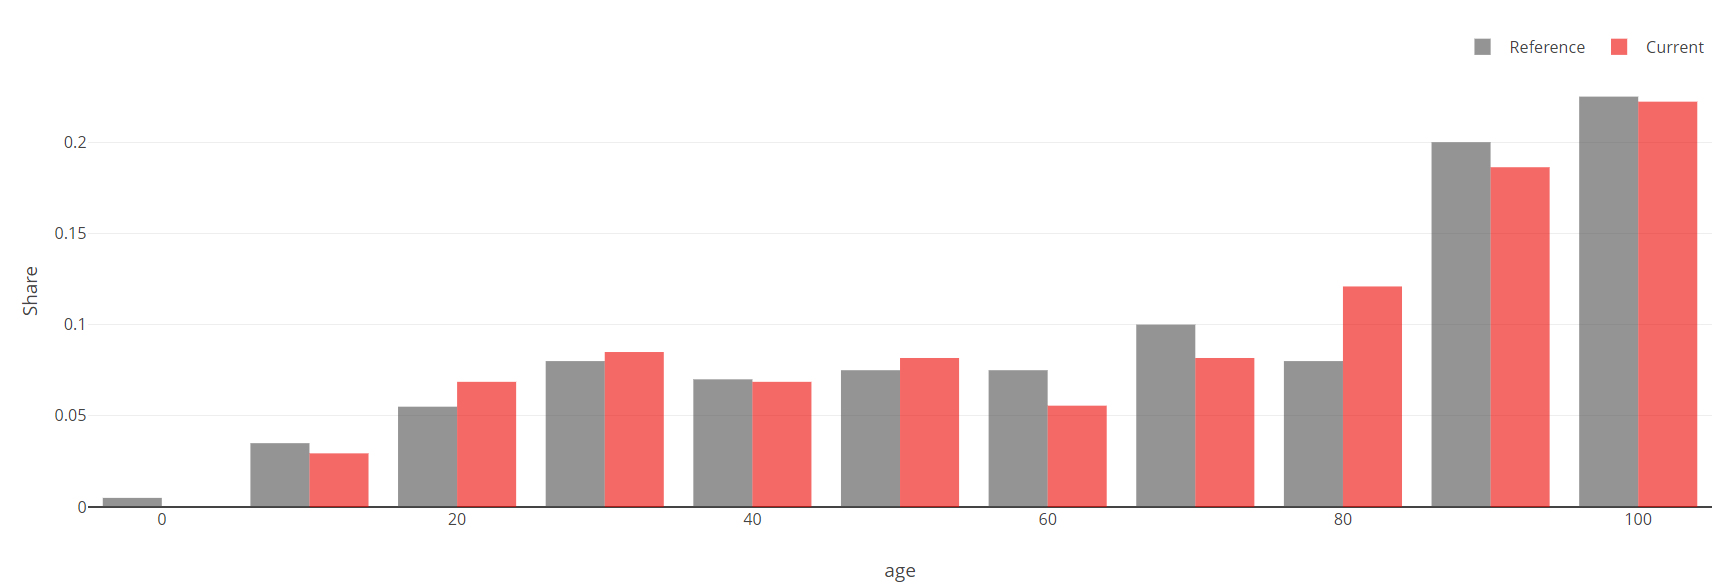


in the above image here- the data distribution is almost same distrubated in both sets training & testing

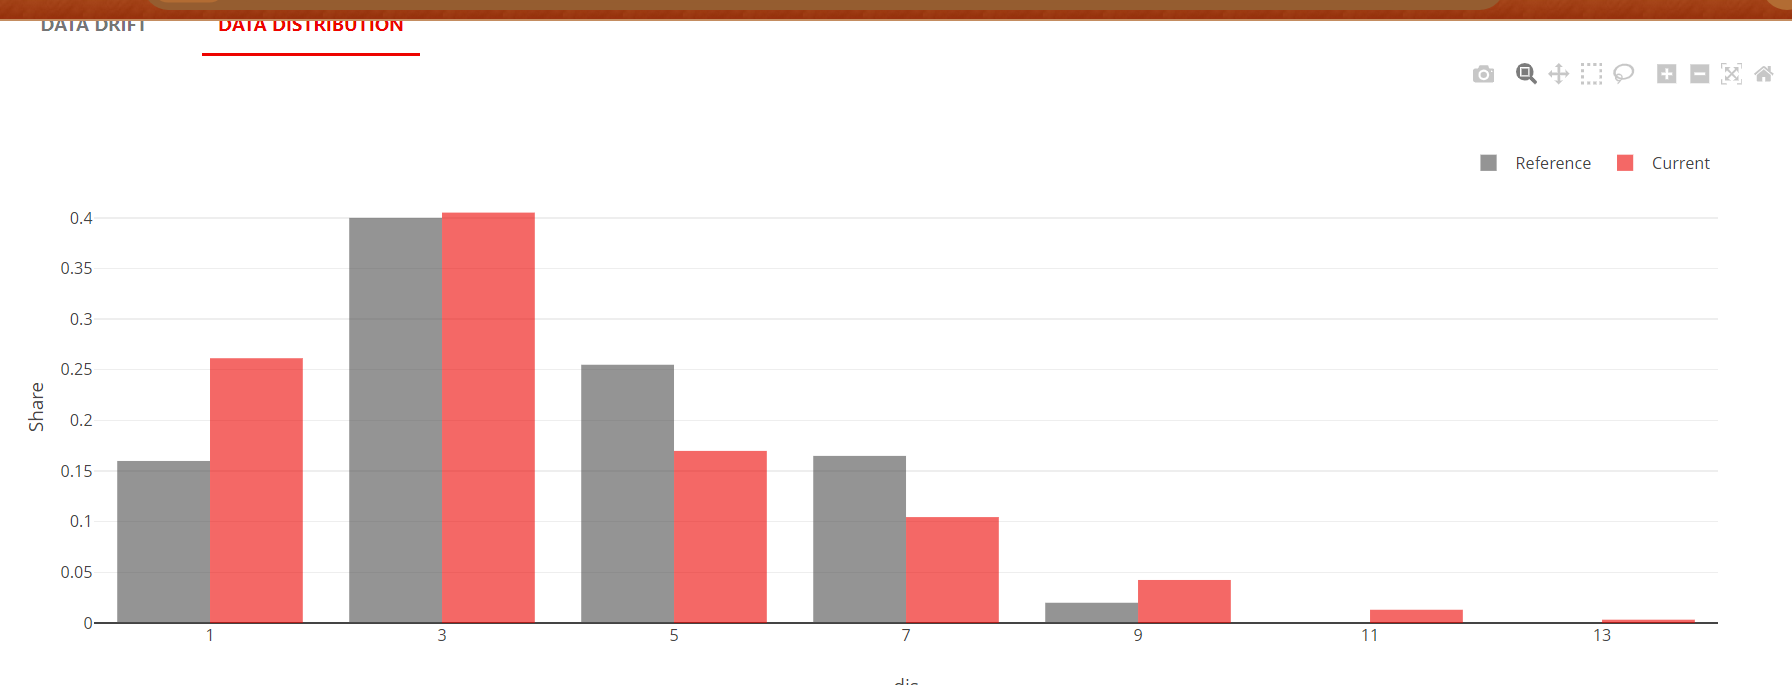

here the data drift is clearly visible viy distribution of data that is not same  in 2 sets.

In [13]:
# Naming the columns using Column Mapping
boston_frame.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [14]:
column_mapping = {}

# column_mapping['target'] = 'target'
# column_mapping['prediction'] = None
# column_mapping['datetime'] = None

column_mapping['numerical_features'] = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax',
                                        'ptratio', 'b', 'lstat']

column_mapping['categorical_features'] = ['chas', 'rad']

In [15]:
column_mapping


{'numerical_features': ['crim',
  'zn',
  'indus',
  'nox',
  'rm',
  'age',
  'dis',
  'tax',
  'ptratio',
  'b',
  'lstat'],
 'categorical_features': ['chas', 'rad']}

In [16]:
boston_data_drift_dashboard.calculate(boston_frame[:200], boston_frame[200:], column_mapping = column_mapping)


AttributeError: 'dict' object has no attribute 'datetime'

In [17]:
from evidently.dashboard import Dashboard
from evidently.pipeline.column_mapping import ColumnMapping

# Creating the ColumnMapping instance
column_mapping = ColumnMapping(
    numerical_features=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat'],
    categorical_features=['chas', 'rad'],
)

# Assuming boston_data_drift_dashboard is an instance of Dashboard
boston_data_drift_dashboard.calculate(boston_frame[:200], boston_frame[200:], column_mapping=column_mapping)


c:\Users\bkapoor\.conda\envs\visa\lib\site-packages\scipy\stats\_stats_py.py:7407: RuntimeWarning:

divide by zero encountered in divide



In [18]:
boston_data_drift_dashboard.show()


In [19]:
boston_data_drift_dashboard.save('boston_data_drift_with_mapping_1.html')


## Data Drift Profile


In [20]:
boston_data_drift_profile = Profile(sections=[DataDriftProfileSection()])
boston_data_drift_profile.calculate(boston_frame[:200], boston_frame[200:])
boston_data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2024-06-01 14:10:56.281946", "data": {"utility_columns": {"date": null, "id": null, "target": null, "prediction": null}, "num_feature_names": ["age", "b", "chas", "crim", "dis", "indus", "lstat", "medv", "nox", "ptratio", "rad", "rm", "tax", "zn"], "cat_feature_names": [], "text_feature_names": [], "datetime_feature_names": [], "target_names": null, "options": {"confidence": null, "drift_share": 0.5, "nbinsx": 10, "xbins": null}, "metrics": {"n_features": 14, "n_drifted_features": 11, "share_drifted_features": 0.7857142857142857, "dataset_drift": true, "age": {"current_small_hist": {"x": [6.8, 16.12, 25.44, 34.76, 44.08, 53.4, 62.72, 72.04, 81.36, 90.67999999999999, 100.0], "y": [0.0035064097169626076, 0.007012819433925215, 0.008766024292406523, 0.007363460405621476, 0.007714101377317736, 0.006311537490532693, 0.00736346040562147, 0.010168588179191569, 0.014726920811242964, 0.03436281522623352]}, "ref_small_hist": {"x": [2.9, 12.61, 2